In [1]:
#cargar drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
hongos = pd.read_csv('/content/drive/MyDrive/datasetDataCamp/secondary_data.csv', sep=';')

In [4]:
print(hongos.head())

  class  cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0     p         15.26         x           g         o                    f   
1     p         16.60         x           g         o                    f   
2     p         14.07         x           g         o                    f   
3     p         14.17         f           h         e                    f   
4     p         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  ...  stem-root  \
0               e          NaN          w        16.95  ...          s   
1               e          NaN          w        17.99  ...          s   
2               e          NaN          w        17.80  ...          s   
3               e          NaN          w        15.77  ...          s   
4               e          NaN          w        16.53  ...          s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y   

In [5]:
hongos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [6]:
hongos.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [7]:
import pandas as pd

# Filtrar columnas de tipo object
object_cols = hongos.select_dtypes(include=['object']).columns

# Contar valores únicos en cada columna categórica
for col in object_cols:
    print(f"{col}: {hongos[col].nunique()} valores únicos")


class: 2 valores únicos
cap-shape: 7 valores únicos
cap-surface: 11 valores únicos
cap-color: 12 valores únicos
does-bruise-or-bleed: 2 valores únicos
gill-attachment: 7 valores únicos
gill-spacing: 3 valores únicos
gill-color: 12 valores únicos
stem-root: 5 valores únicos
stem-surface: 8 valores únicos
stem-color: 13 valores únicos
veil-type: 1 valores únicos
veil-color: 6 valores únicos
has-ring: 2 valores únicos
ring-type: 8 valores únicos
spore-print-color: 7 valores únicos
habitat: 8 valores únicos
season: 4 valores únicos


In [8]:
for col in object_cols:
    print(f"\nColumna: {col}")
    print(hongos[col].unique())



Columna: class
['p' 'e']

Columna: cap-shape
['x' 'f' 'p' 'b' 'c' 's' 'o']

Columna: cap-surface
['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']

Columna: cap-color
['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']

Columna: does-bruise-or-bleed
['f' 't']

Columna: gill-attachment
['e' nan 'a' 'd' 's' 'x' 'p' 'f']

Columna: gill-spacing
[nan 'c' 'd' 'f']

Columna: gill-color
['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']

Columna: stem-root
['s' nan 'b' 'r' 'c' 'f']

Columna: stem-surface
['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']

Columna: stem-color
['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']

Columna: veil-type
['u' nan]

Columna: veil-color
['w' 'y' nan 'n' 'e' 'u' 'k']

Columna: has-ring
['t' 'f']

Columna: ring-type
['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']

Columna: spore-print-color
[nan 'w' 'p' 'k' 'r' 'u' 'n' 'g']

Columna: habitat
['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']

Columna: season
['w' 'u' 'a' 's']


# **Procesamiento de los datos**

In [9]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
# Crear una copia para trabajar
hongos_encoded = hongos.copy()

In [11]:
# VARIABLES BINARIAS (0/1) - 2 valores únicos
binary_columns = {
    'class': {'p': 0, 'e': 1},  # poisonous=0, edible=1
    'does-bruise-or-bleed': {'f': 0, 't': 1},  # no=0, yes=1
    'has-ring': {'f': 0, 't': 1}  # no=0, yes=1
}

# Aplicar codificación binaria
for col, mapping in binary_columns.items():
    hongos_encoded[col] = hongos_encoded[col].map(mapping)

In [12]:
# VARIABLES CON ORDEN NATURAL - LABEL ENCODING
# Estas variables tienen un orden intrínseco que es importante preservar

# gill-spacing: tiene orden natural (close < distant)
gill_spacing_map = {'c': 0, 'd': 1}  # close=0, distant=1
hongos_encoded['gill-spacing'] = hongos_encoded['gill-spacing'].map(gill_spacing_map)

# season: tiene orden natural (spring, summer, autumn, winter)
season_map = {'s': 0, 'u': 1, 'a': 2, 'w': 3}  # spring=0, summer=1, autumn=2, winter=3
hongos_encoded['season'] = hongos_encoded['season'].map(season_map)


In [13]:
# VARIABLES SIN ORDEN NATURAL - ONE HOT ENCODING
# Estas variables tienen múltiples categorías sin orden intrínseco

categorical_for_onehot = [
    'cap-shape',      # 7 valores - formas geométricas sin orden
    'cap-surface',    # 11 valores - texturas superficiales
    'cap-color',      # 12 valores - colores
    'gill-attachment', # 7 valores - tipos de unión
    'gill-color',     # 12 valores - colores
    'stem-root',      # 5 valores - formas de raíz
    'stem-surface',   # 8 valores - texturas superficiales
    'stem-color',     # 13 valores - colores
    'veil-color',     # 6 valores - colores
    'ring-type',      # 8 valores - tipos de anillo
    'spore-print-color', # 7 valores - colores
    'habitat'         # 8 valores - tipos de hábitat
]

# Aplicar One-Hot Encoding
for col in categorical_for_onehot:
    if col in hongos_encoded.columns:
        # Crear variables dummy
        dummies = pd.get_dummies(hongos_encoded[col], prefix=col, dummy_na=True)

        # Concatenar con el dataframe original
        hongos_encoded = pd.concat([hongos_encoded, dummies], axis=1)

        # Eliminar la columna original
        hongos_encoded = hongos_encoded.drop(col, axis=1)

# CASOS ESPECIALES - LABEL ENCODING
# veil-type: solo tiene 1 valor único ('u'), se puede eliminar o mantener como constante
if 'veil-type' in hongos_encoded.columns:
    # Como solo hay un valor, esta columna no aporta información
    hongos_encoded = hongos_encoded.drop('veil-type', axis=1)
    print("Columna 'veil-type' eliminada por tener un solo valor único")

# Manejar valores NaN si existen
hongos_encoded = hongos_encoded.fillna(0)  # Los NaN en one-hot encoding ya se manejan con dummy_na=True


Columna 'veil-type' eliminada por tener un solo valor único


In [14]:

# Mostrar información del dataset transformado
print("Dataset original:")
print(f"Forma: {hongos.shape}")
print("\nDataset codificado:")
print(f"Forma: {hongos_encoded.shape}")

print("\nPrimeras 5 filas del dataset codificado:")
print(hongos_encoded.head())

print("\nTipos de datos después de la transformación:")
print(hongos_encoded.dtypes.value_counts())

print("\nColumnas con valores NaN:")
print(hongos_encoded.isnull().sum()[hongos_encoded.isnull().sum() > 0])

# Verificar que todas las columnas son numéricas
non_numeric_cols = hongos_encoded.select_dtypes(exclude=[np.number]).columns
if len(non_numeric_cols) > 0:
    print(f"\nAdvertencia: Columnas no numéricas encontradas: {list(non_numeric_cols)}")
else:
    print("\n✓ Todas las columnas son numéricas")

# Guardar el dataset transformado (opcional)
# hongos_encoded.to_csv('/content/drive/MyDrive/datasetDataCamp/hongos_encoded.csv', index=False)

print(f"\nDataset final guardado con {hongos_encoded.shape[1]} características numéricas")

Dataset original:
Forma: (61069, 21)

Dataset codificado:
Forma: (61069, 124)

Primeras 5 filas del dataset codificado:
   class  cap-diameter  does-bruise-or-bleed  gill-spacing  stem-height  \
0      0         15.26                     0           0.0        16.95   
1      0         16.60                     0           0.0        17.99   
2      0         14.07                     0           0.0        17.80   
3      0         14.17                     0           0.0        15.77   
4      0         14.64                     0           0.0        16.53   

   stem-width  has-ring  season  cap-shape_b  cap-shape_c  ...  \
0       17.09         1       3        False        False  ...   
1       18.19         1       1        False        False  ...   
2       17.74         1       3        False        False  ...   
3       15.98         1       3        False        False  ...   
4       17.20         1       3        False        False  ...   

   spore-print-color_nan  habita

In [15]:
# 1. Eliminar filas con valores faltantes
hongos_encoded = hongos_encoded.dropna()

# 2. Convertir booleanos (True/False) en enteros (1/0)
hongos_encoded = hongos_encoded.astype(int)

# Renombrar el DataFrame resultante
hongos_encoded = hongos_encoded

print(hongos_encoded.head())
print("Shape final después de limpiar y numerizar:", hongos_encoded.shape)

   class  cap-diameter  does-bruise-or-bleed  gill-spacing  stem-height  \
0      0            15                     0             0           16   
1      0            16                     0             0           17   
2      0            14                     0             0           17   
3      0            14                     0             0           15   
4      0            14                     0             0           16   

   stem-width  has-ring  season  cap-shape_b  cap-shape_c  ...  \
0          17         1       3            0            0  ...   
1          18         1       1            0            0  ...   
2          17         1       3            0            0  ...   
3          15         1       3            0            0  ...   
4          17         1       3            0            0  ...   

   spore-print-color_nan  habitat_d  habitat_g  habitat_h  habitat_l  \
0                      1          1          0          0          0   
1       

In [16]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Configurar matplotlib para mostrar gráficos
plt.style.use('default')

print("=== CLASIFICACIÓN DE HONGOS CON REGRESIÓN LOGÍSTICA ===\n")

=== CLASIFICACIÓN DE HONGOS CON REGRESIÓN LOGÍSTICA ===



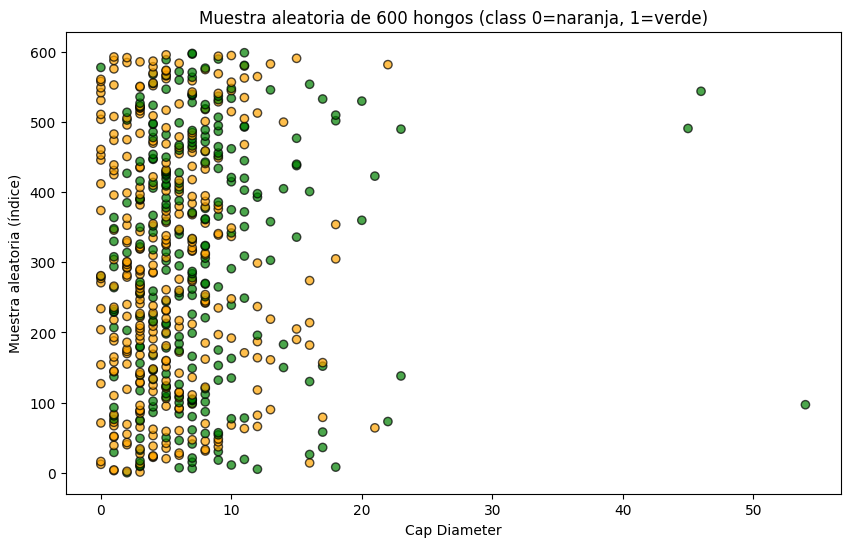

In [20]:
import matplotlib.pyplot as plt

def plot_random_classes(df, n=360):
    # Tomar una muestra aleatoria
    sample = df.sample(n=n, random_state=None)

    # Asegurar que 'class' esté en formato numérico (0,1)
    y = sample['class']
    if y.dtype == 'object':
        y = y.astype('category').cat.codes  # convierte 'e','p' en 0,1 automáticamente

    # Colores: 0 = naranja, 1 = verde
    colors = np.where(y == 0, 'orange', 'green')

    plt.figure(figsize=(10, 6))
    plt.scatter(sample['cap-diameter'], range(len(sample)), c=colors, alpha=0.7, edgecolor='k')
    plt.xlabel("Cap Diameter")
    plt.ylabel("Muestra aleatoria (índice)")
    plt.title(f"Muestra aleatoria de {n} hongos (class 0=naranja, 1=verde)")
    plt.show()

# Uso:
plot_random_classes(hongos_encoded, 600)


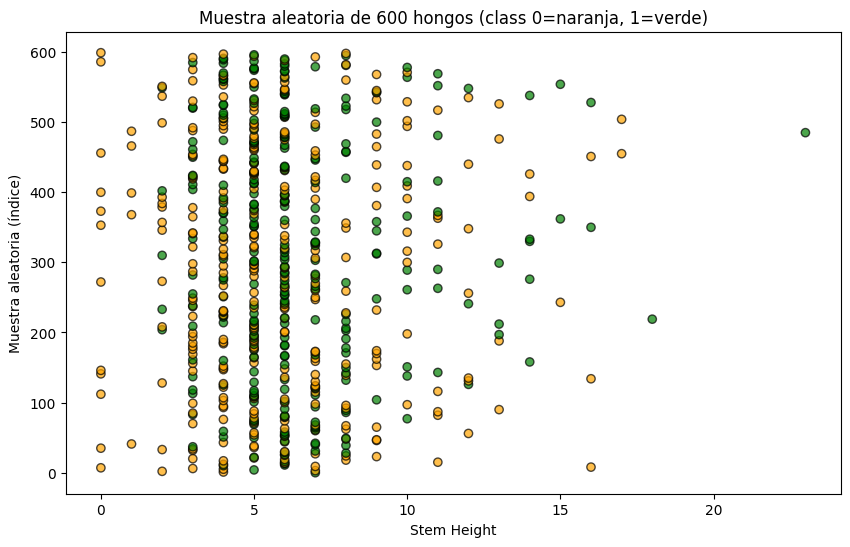

In [21]:
def plot_random_classes(df, n=360):
    # Tomar una muestra aleatoria
    sample = df.sample(n=n, random_state=None)

    # Asegurar que 'class' esté en formato numérico (0,1)
    y = sample['class']
    if y.dtype == 'object':
        y = y.astype('category').cat.codes  # convierte 'e','p' en 0,1 automáticamente

    # Colores: 0 = naranja, 1 = verde
    colors = np.where(y == 0, 'orange', 'green')

    plt.figure(figsize=(10, 6))
    plt.scatter(sample['stem-height'], range(len(sample)), c=colors, alpha=0.7, edgecolor='k')
    plt.xlabel("Stem Height")
    plt.ylabel("Muestra aleatoria (índice)")
    plt.title(f"Muestra aleatoria de {n} hongos (class 0=naranja, 1=verde)")
    plt.show()

# Uso:
plot_random_classes(hongos_encoded, 600)

In [53]:
# Separar características y variable objetivo
X = hongos_encoded.drop('class', axis=1).values
y = hongos_encoded['class'].values

print(f"\nShape de X: {X.shape}")
print(f"Shape de y: {y.shape}")
print(f"Distribución de clases: Clase 0: {np.sum(y == 0)}, Clase 1: {np.sum(y == 1)}")



Shape de X: (61069, 123)
Shape de y: (61069,)
Distribución de clases: Clase 0: 33888, Clase 1: 27181


In [43]:
import numpy as np
from sklearn.utils import resample

# Assuming hongos_encoded is your DataFrame with the encoded features and target
# X and y are already defined as per your input
# X = hongos_encoded.drop('class', axis=1).values
# y = hongos_encoded['class'].values

# Separate the data by class
X_class0 = X[y == 0]
y_class0 = y[y == 0]
X_class1 = X[y == 1]
y_class1 = y[y == 1]

# Undersample Class 0 to 25,000 samples
X_class0_under, y_class0_under = resample(X_class0, y_class0,
                                          replace=False,  # No replacement (undersampling)
                                          n_samples=25000,
                                          random_state=42)

# Undersample Class 1 to 25,000 samples
X_class1_under, y_class1_under = resample(X_class1, y_class1,
                                          replace=False,  # No replacement (undersampling)
                                          n_samples=25000,
                                          random_state=42)

# Combine the balanced datasets
X = np.vstack((X_class0_under, X_class1_under))
y = np.hstack((y_class0_under, y_class1_under))

# Verify the shapes and class distribution
print(f"Shape de X_balanced: {X.shape}")
print(f"Shape de y_balanced: {y.shape}")
print(f"Distribución de clases: Clase 0: {np.sum(y == 0)}, Clase 1: {np.sum(y == 1)}")

Shape de X_balanced: (50000, 123)
Shape de y_balanced: (50000,)
Distribución de clases: Clase 0: 25000, Clase 1: 25000


In [54]:
# =====================================================================
# 2. NORMALIZACIÓN DE COLUMNAS ESPECÍFICAS
# =====================================================================

print("\n2. Normalizando columnas específicas...")

# Identificar índices de las columnas a normalizar
columns_to_normalize = ['cap-diameter', 'stem-height', 'stem-width']
normalize_indices = [list(hongos_encoded.columns).index(col) - 1 for col in columns_to_normalize if col in hongos_encoded.columns]

print(f"Índices de columnas a normalizar: {normalize_indices}")

# Crear copia de X para normalización
X_normalized = X.copy()

# Normalizar solo las columnas especificadas
scaler = StandardScaler()
if normalize_indices:
    X_normalized[:, normalize_indices] = scaler.fit_transform(X[:, normalize_indices])
    print("Normalización completada para las columnas especificadas.")


2. Normalizando columnas específicas...
Índices de columnas a normalizar: [0, 3, 4]
Normalización completada para las columnas especificadas.


In [55]:
# Verify the shapes and class distribution
print(f"Shape de X_balanced: {X.shape}")
print(f"Shape de y_balanced: {y.shape}")
print(f"Distribución de clases: Clase 0: {np.sum(y == 0)}, Clase 1: {np.sum(y == 1)}")

Shape de X_balanced: (61069, 123)
Shape de y_balanced: (61069,)
Distribución de clases: Clase 0: 33888, Clase 1: 27181


In [56]:
# =====================================================================
# 3. DIVISIÓN EN TRAIN Y TEST
# =====================================================================

print("\n3. Dividiendo dataset en train y test...")

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Shape de y_test: {y_test.shape}")


3. Dividiendo dataset en train y test...
Shape de X_train: (48855, 123)
Shape de X_test: (12214, 123)
Shape de y_train: (48855,)
Shape de y_test: (12214,)


# **Entrenamiento del modelo**

In [57]:
# =====================================================================
# 4. IMPLEMENTACIÓN DE FUNCIONES
# =====================================================================

print("\n4. Definiendo funciones...")

def sigmoid(z):
    """
    Calcula la función sigmoidea de z
    """
    # Clip z para evitar overflow
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

def calcular_costo(theta, X, y):
    """
    Calcula el costo de la regresión logística
    """
    m = y.size
    h = sigmoid(X.dot(theta))

    # Agregar pequeño valor para evitar log(0)
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)

    J = (1 / m) * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    return J

def descenso_gradiente(theta, X, y, alpha, num_iters):
    """
    Ejecuta descenso por gradiente para regresión logística
    """
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * X.T.dot(h - y)
        theta = theta - alpha * gradient

        cost = calcular_costo(theta, X, y)
        J_history.append(cost)

        # Mostrar progreso cada 1000 iteraciones
        if (i + 1) % 1000 == 0:
            print(f"Iteración {i+1}/{num_iters}, Costo: {cost:.6f}")

    return theta, J_history

def predecir(theta, X):
    """
    Hace predicciones usando el modelo entrenado
    """
    return sigmoid(X.dot(theta)) >= 0.5

def calcular_precision(theta, X, y):
    """
    Calcula la precisión del modelo
    """
    predicciones = predecir(theta, X)
    return np.mean(predicciones == y)


4. Definiendo funciones...


In [58]:
# =====================================================================
# 5. AGREGAR TÉRMINO DE INTERCEPCIÓN
# =====================================================================

print("\n5. Agregando término de intercepción...")

# Agregar columna de unos para el término de intercepción
m_train, n_features = X_train.shape
X_train_with_intercept = np.concatenate([np.ones((m_train, 1)), X_train], axis=1)

m_test, _ = X_test.shape
X_test_with_intercept = np.concatenate([np.ones((m_test, 1)), X_test], axis=1)

print(f"Shape de X_train con intercepción: {X_train_with_intercept.shape}")
print(f"Shape de X_test con intercepción: {X_test_with_intercept.shape}")



5. Agregando término de intercepción...
Shape de X_train con intercepción: (48855, 124)
Shape de X_test con intercepción: (12214, 124)


In [59]:
# =====================================================================
# 6. CONFIGURACIÓN DE HIPERPARÁMETROS Y ENTRENAMIENTO
# =====================================================================

print("\n6. Configurando hiperparámetros y entrenando el modelo...")

# Hiperparámetros
alpha = 0.005  # Tasa de aprendizaje
num_iters = 12000  # Número de iteraciones

# Inicializar theta
initial_theta = np.zeros(n_features + 1)  # +1 por el término de intercepción

print(f"Theta inicial shape: {initial_theta.shape}")
print(f"Tasa de aprendizaje: {alpha}")
print(f"Número de iteraciones: {num_iters}")

# Calcular costo inicial
costo_inicial = calcular_costo(initial_theta, X_train_with_intercept, y_train)
print(f"Costo inicial: {costo_inicial:.6f}")

# Entrenar el modelo
print("\nEntrenando modelo...")
theta_final, J_history_train = descenso_gradiente(
    initial_theta, X_train_with_intercept, y_train, alpha, num_iters
)

print(f"\nEntrenamiento completado!")
print(f"Costo final de entrenamiento: {J_history_train[-1]:.6f}")


6. Configurando hiperparámetros y entrenando el modelo...
Theta inicial shape: (124,)
Tasa de aprendizaje: 0.005
Número de iteraciones: 12000
Costo inicial: 0.693147

Entrenando modelo...
Iteración 1000/12000, Costo: 0.636197
Iteración 2000/12000, Costo: 0.606323
Iteración 3000/12000, Costo: 0.584961
Iteración 4000/12000, Costo: 0.568283
Iteración 5000/12000, Costo: 0.554671
Iteración 6000/12000, Costo: 0.543246
Iteración 7000/12000, Costo: 0.533462
Iteración 8000/12000, Costo: 0.524955
Iteración 9000/12000, Costo: 0.517469
Iteración 10000/12000, Costo: 0.510815
Iteración 11000/12000, Costo: 0.504849
Iteración 12000/12000, Costo: 0.499463

Entrenamiento completado!
Costo final de entrenamiento: 0.499463


In [60]:
# =====================================================================
# 7. EVALUACIÓN Y GRÁFICOS
# =====================================================================

print("\n7. Evaluando modelo...")

# Calcular pérdida en test para cada iteración (para gráfico)
J_history_test = []
theta_temp = initial_theta.copy()

for i in range(num_iters):
    h = sigmoid(X_train_with_intercept.dot(theta_temp))
    gradient = (1 / m_train) * X_train_with_intercept.T.dot(h - y_train)
    theta_temp = theta_temp - alpha * gradient

    # Calcular costo en test
    costo_test = calcular_costo(theta_temp, X_test_with_intercept, y_test)
    J_history_test.append(costo_test)

# Calcular precisiones
precision_train = calcular_precision(theta_final, X_train_with_intercept, y_train)
precision_test = calcular_precision(theta_final, X_test_with_intercept, y_test)

print(f"Precisión en entrenamiento: {precision_train:.4f} ({precision_train*100:.2f}%)")
print(f"Precisión en test: {precision_test:.4f} ({precision_test*100:.2f}%)")



7. Evaluando modelo...
Precisión en entrenamiento: 0.7807 (78.07%)
Precisión en test: 0.7715 (77.15%)



8. Generando gráficos...


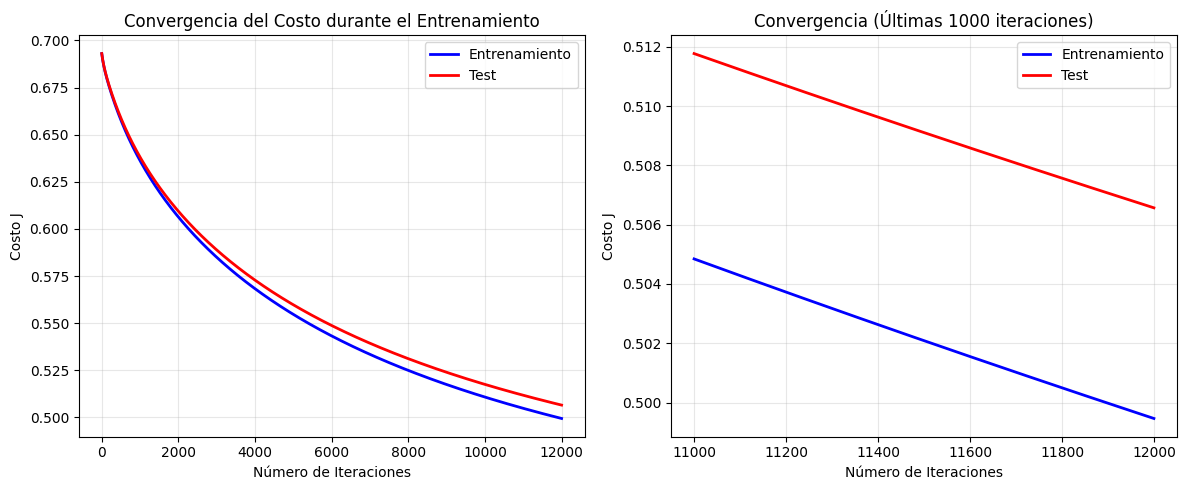

In [61]:
# =====================================================================
# 8. GRÁFICOS
# =====================================================================

print("\n8. Generando gráficos...")

# Gráfico de convergencia del costo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(num_iters), J_history_train, 'b-', label='Entrenamiento', linewidth=2)
plt.plot(range(num_iters), J_history_test, 'r-', label='Test', linewidth=2)
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del Costo durante el Entrenamiento')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico de últimas 1000 iteraciones para ver convergencia
plt.subplot(1, 2, 2)
start_idx = max(0, num_iters - 1000)
plt.plot(range(start_idx, num_iters), J_history_train[start_idx:], 'b-', label='Entrenamiento', linewidth=2)
plt.plot(range(start_idx, num_iters), J_history_test[start_idx:], 'r-', label='Test', linewidth=2)
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia (Últimas 1000 iteraciones)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [62]:
# =====================================================================
# 9. FUNCIÓN DE PREDICCIÓN PARA NUEVOS EJEMPLOS
# =====================================================================

print("\n9. Creando función de predicción...")

def predecir_nuevo_ejemplo(ejemplo, theta, scaler_indices=None, scaler=None):
    """
    Predice la clase de un nuevo ejemplo

    Parámetros:
    - ejemplo: array con las características del ejemplo (sin intercepción)
    - theta: parámetros entrenados del modelo
    - scaler_indices: índices de las columnas que fueron normalizadas
    - scaler: objeto StandardScaler usado para normalización

    Retorna:
    - prediccion: 0 o 1
    - probabilidad: probabilidad de ser clase 1
    """
    ejemplo = np.array(ejemplo).reshape(1, -1)

    # Normalizar columnas específicas si es necesario
    if scaler_indices and scaler:
        ejemplo_normalizado = ejemplo.copy()
        ejemplo_normalizado[0, scaler_indices] = scaler.transform(ejemplo[:, scaler_indices])[0]
    else:
        ejemplo_normalizado = ejemplo

    # Agregar término de intercepción
    ejemplo_con_intercept = np.concatenate([np.ones((1, 1)), ejemplo_normalizado], axis=1)

    # Calcular probabilidad
    probabilidad = sigmoid(ejemplo_con_intercept.dot(theta))[0]

    # Hacer predicción
    prediccion = 1 if probabilidad >= 0.5 else 0

    return prediccion, probabilidad



9. Creando función de predicción...


In [63]:
# =====================================================================
# 10. PRUEBAS CON EJEMPLOS
# =====================================================================

print("\n10. Probando con ejemplos...")

# Probar con algunos ejemplos del conjunto de test
print("Ejemplos de predicción:")
for i in range(10):
    ejemplo = X_test[i]
    prediccion, probabilidad = predecir_nuevo_ejemplo(
        ejemplo, theta_final, normalize_indices, scaler
    )
    clase_real = y_test[i]
    if(prediccion==0):
      tipo="venenoso"
    else:
      tipo="comestible"

    print(f"Ejemplo {i+1}:")
    print(f"  Predicción: {prediccion}", f"( {tipo} )" ", Probabilidad: {probabilidad:.4f}")
    print(f"  Clase real: {clase_real}")
    print(f"  Correcto: {'✓' if prediccion == clase_real else '✗'}")
    print()


10. Probando con ejemplos...
Ejemplos de predicción:
Ejemplo 1:
  Predicción: 1 ( comestible ), Probabilidad: {probabilidad:.4f}
  Clase real: 1
  Correcto: ✓

Ejemplo 2:
  Predicción: 0 ( venenoso ), Probabilidad: {probabilidad:.4f}
  Clase real: 0
  Correcto: ✓

Ejemplo 3:
  Predicción: 0 ( venenoso ), Probabilidad: {probabilidad:.4f}
  Clase real: 1
  Correcto: ✗

Ejemplo 4:
  Predicción: 0 ( venenoso ), Probabilidad: {probabilidad:.4f}
  Clase real: 1
  Correcto: ✗

Ejemplo 5:
  Predicción: 0 ( venenoso ), Probabilidad: {probabilidad:.4f}
  Clase real: 0
  Correcto: ✓

Ejemplo 6:
  Predicción: 0 ( venenoso ), Probabilidad: {probabilidad:.4f}
  Clase real: 0
  Correcto: ✓

Ejemplo 7:
  Predicción: 1 ( comestible ), Probabilidad: {probabilidad:.4f}
  Clase real: 0
  Correcto: ✗

Ejemplo 8:
  Predicción: 0 ( venenoso ), Probabilidad: {probabilidad:.4f}
  Clase real: 1
  Correcto: ✗

Ejemplo 9:
  Predicción: 0 ( venenoso ), Probabilidad: {probabilidad:.4f}
  Clase real: 0
  Correcto: 